Connected to audio_feature_extraction (Python 3.11.7)

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
audio_file = "audio_datasets/TargetEvent/target_air_conditioner_URBANSOUND8K/13230-0-0-1.wav"
y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate

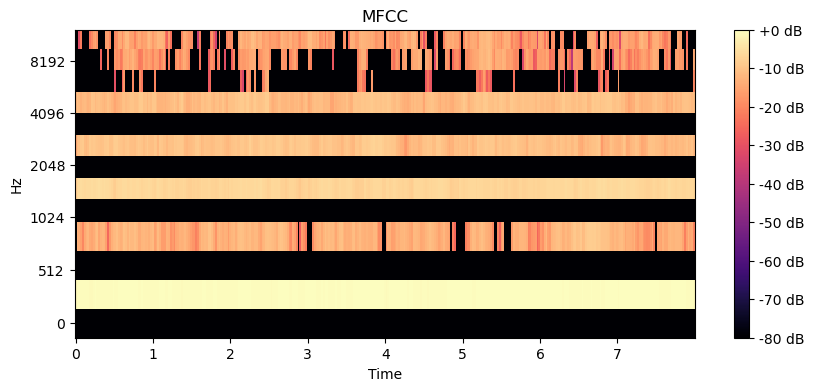

In [3]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)
# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

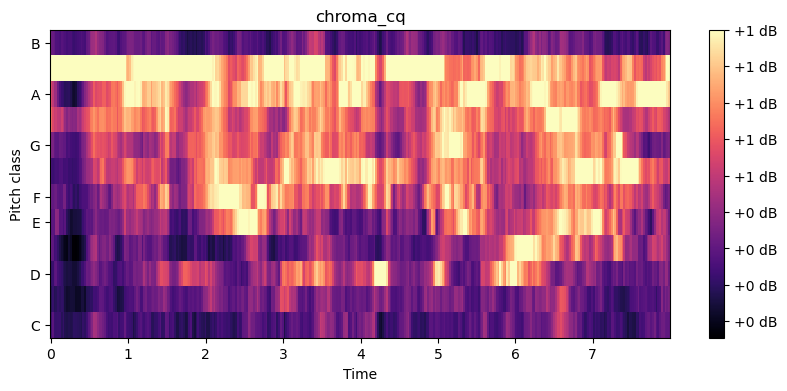

In [4]:
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
# Visualize the Chroma Cq
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('chroma_cq')
plt.show()

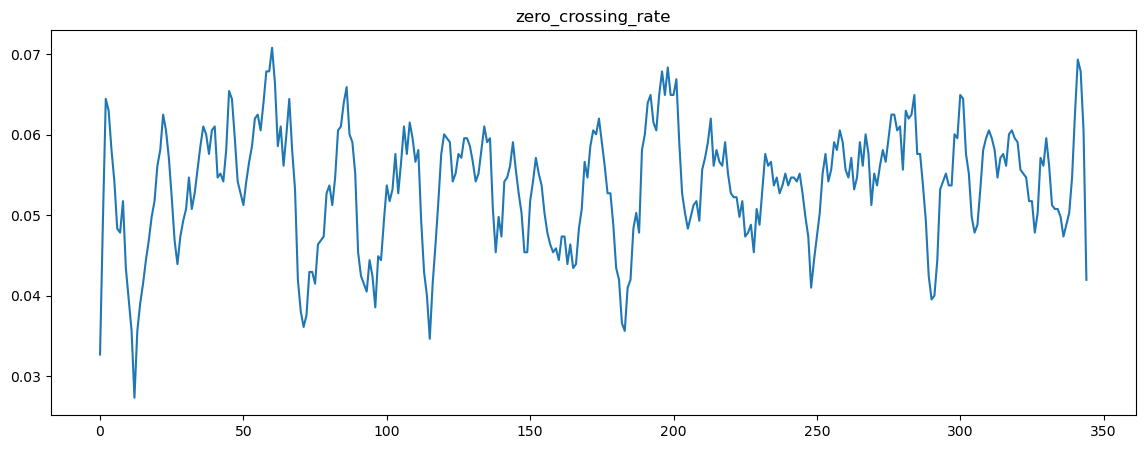

In [5]:
'''
The zero-crossing rate (ZCR) is the rate at which a signal transitions from positive to zero to negative or negative to zero to positive. 
Its value has been extensively used in both speech recognition and music information retrieval for classifying percussive sounds
'''
zero_cr = librosa.feature.zero_crossing_rate(y)
#Visualize the zcr
plt.figure(figsize=(14, 5))
plt.plot(zero_cr[0])
plt.title('zero_crossing_rate')
plt.show()

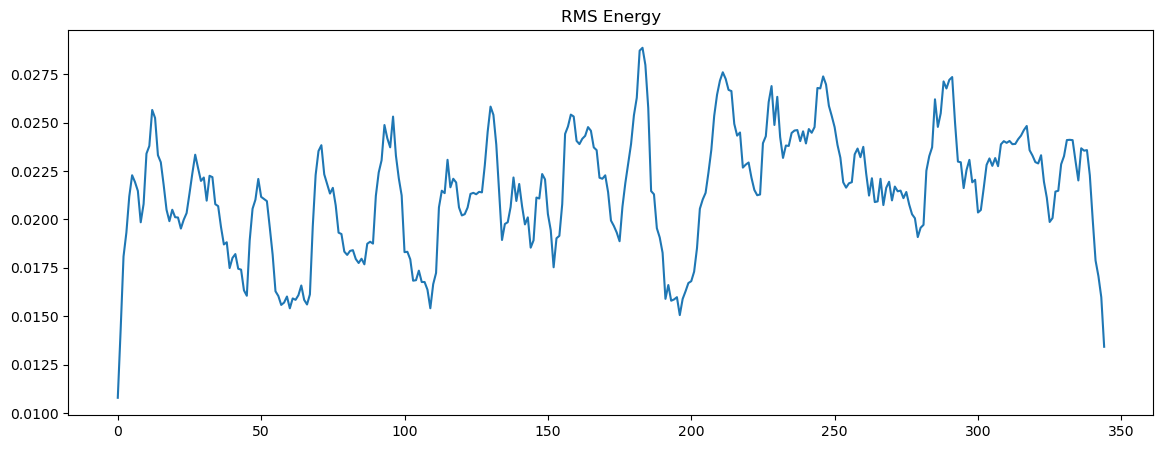

In [6]:
'''
The overall magnitude of a signal corresponds to its energy. For audio signals, this generally equates to how loud the signal is
RMS is a useful method of computing the average of variables across time. When dealing with audio, the signal value (amplitude) is squared, 
averaged over time, and then the square root of the result is determined.
'''
rms = librosa.feature.rms(y=y)
#Visualize the rms
plt.figure(figsize=(14, 5))
plt.plot(rms[0])
plt.title('RMS Energy')
plt.show()

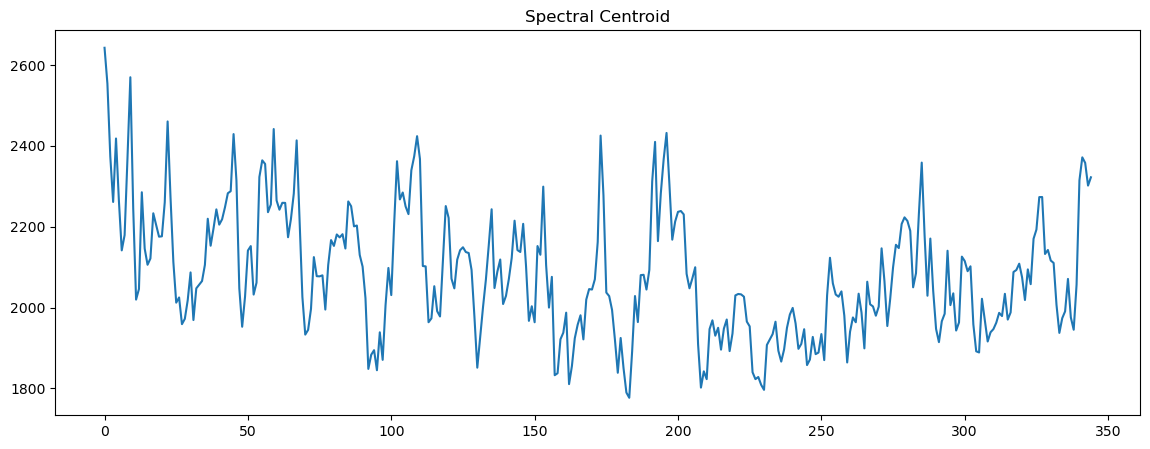

In [7]:
'''
The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of 
the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound. It is sometimes called 
center of spectral mass
'''
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#Visualize the spectral centroid
plt.figure(figsize=(14, 5))
plt.plot(cent[0])
plt.title('Spectral Centroid')
plt.show()

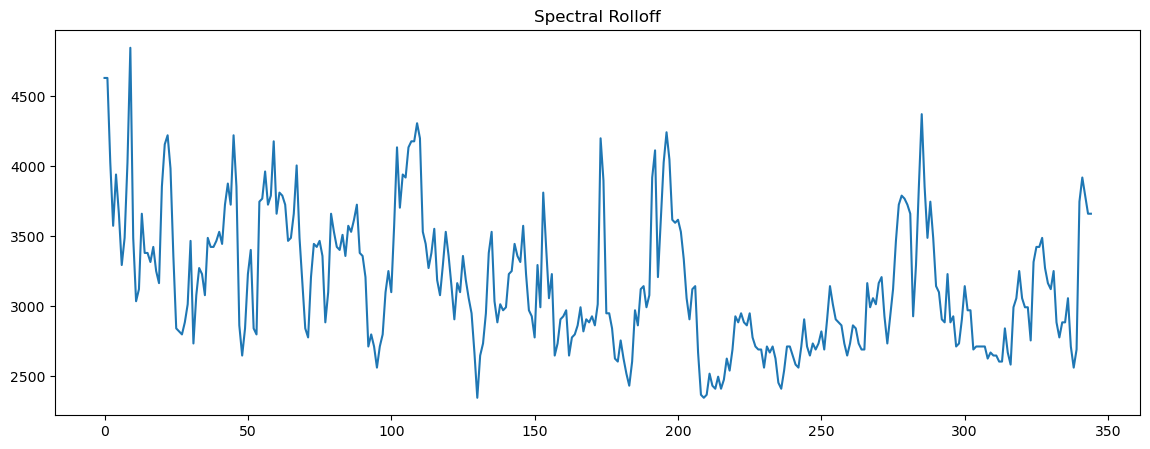

In [8]:
'''
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, here; 85%, lies
'''
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#Visualize the spectral rolloff
plt.figure(figsize=(14, 5))
plt.plot(rolloff[0])
plt.title('Spectral Rolloff')
plt.show()

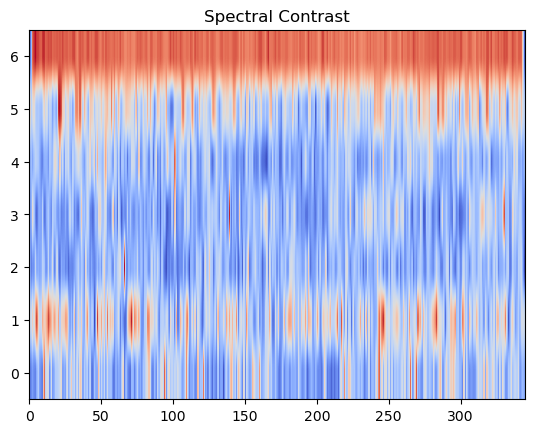

In [9]:
'''
Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband
'''
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Define a helper function to normalize the spectral centroid for visualization:
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

plt.imshow(normalize(contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
plt.title('Spectral Contrast')
plt.show()